# **Rotten Tomatoes Analysis**


## **Imports**

In [2]:
import numpy as np
import pandas as pd
import re
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

## **Working Files**


In [3]:
rt_movie_info = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz',encoding='unicode_escape', sep='\t')
rt_reviews = pd.read_csv('data/zippedData/rt.reviews.tsv.gz',encoding='unicode_escape', sep='\t')

## **High Level Analysis**

### Comment
We have 'id' and 'rating' that match up, but it is too early to tell if they have anything in common.

In [4]:
print(rt_movie_info.columns)
print()
print(rt_reviews.columns)

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')


### Comment:
There is a good chunk of missing data for 'currency', 'box office', and 'studio'. We also have other columns that have a bit of missing values. Depending on their value, I may or may not need to clean them.

In [5]:
print(f'*** rt_reviews DataFrame ***')
rt_reviews.info()

*** rt_reviews DataFrame ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


### Comment:
We do have some more missing values, but the biggest issues are the data types. I may need to convert them to int or float. Most likely the 'rating' column.

In [6]:
print(f'*** rt_movie_info DataFrame ***')
rt_movie_info.info()

*** rt_movie_info DataFrame ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Comment:
Rating in rt_movie_info looks to pertain to the actual movie rating. I do see we can catagorize the genre to make a graph based on that.
I don't see any value for the following columns: 'synopsis', 'currency', 'box office' (missing data, may need to talk with 
Hatice about this one), and studio (may change my mind later).

In [7]:
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [8]:
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [9]:
rt_reviews['review'].notna().value_counts()

True     48869
False     5563
Name: review, dtype: int64

### Analysis Conclusion:
We do have some relatable columns! The 'id' column will come in handy when handling these datasets. The 'rating' column in rt_reviews looks to be a mess, and will take considerable time to clean. The next most useful column would be 'fresh'! Rotten Tomatoes has a rule where if the review is at LEAST 60% in rating, then it is a fresh tomato!. I'm not sure if I can get any valuable data/info from the rest of the columns. Bummer.

## **Cleaning rt_movie_info**
#### Working Variables
- rt_movie_info
- wip_genre
- dropem
- rt_movie_copy
- rt_movie_clean

In [10]:
rt_movie_info.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

### Decision:
Going over the dataset, I am going to remove the following columns: The focus is provide exploring what types of movies are CURRENTLY doing the BEST at the box office.

- 'synopsis' - I don't have a movie title and cannot go through each value to "guess" what movie it is.
- 'director' - Same as 'synopsis'. Directors can have mulitple movies. I can't make a logical guess on this.
- 'writer' - Same as above.
- 'dvd_date' - I'm looking for opening figures.
- 'currency' - Would be relevant if I had more data on 'box office'. It would be possible to see what genre makes the most money.
- 'box_office' - NEED MORE DATA!! I can't use it.
- 'studio' - I'm missing to much data. I can't make a logical guess here.

I'll aslo need to check for duplicates and get rid/alter null values

In [11]:
# creating a copy of the dataframe just in case ;)

rt_movie_copy = rt_movie_info.copy()

# Checking for duplicates
print(rt_movie_copy.duplicated().value_counts())
print(len(rt_movie_copy))

False    1560
dtype: int64
1560


In [12]:
dropem = ['synopsis', 'director', 'writer', 'dvd_date', 'currency', 'studio']
rt_movie_copy = rt_movie_copy.drop(dropem, 1)

rt_movie_copy

,id,rating,genre,theater_date,box_office,runtime
0,1,R,Action and Adventure|Classics|Drama,"Oct 9, 1971",NaN,104 minutes
1,3,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012","600,000",108 minutes
2,5,R,Drama|Musical and Performing Arts,"Sep 13, 1996",NaN,116 minutes
3,6,R,Drama|Mystery and Suspense,"Dec 9, 1994",NaN,128 minutes
4,7,NR,Drama|Romance,NaN,NaN,200 minutes
...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,"Aug 18, 2006","33,886,034",106 minutes
1556,1997,PG,Comedy|Science Fiction and Fantasy,"Jul 23, 1993",NaN,88 minutes
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,"Jan 1, 1962",NaN,111 minutes
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,"Apr 1, 1993",NaN,101 minutes


In [13]:
rt_movie_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   theater_date  1201 non-null   object
 4   box_office    340 non-null    object
 5   runtime       1530 non-null   object
dtypes: int64(1), object(5)
memory usage: 73.2+ KB


In [14]:
rt_movie_copy[rt_movie_copy['genre'].isna()]

,id,rating,genre,theater_date,box_office,runtime
10,17,NaN,NaN,NaN,NaN,NaN
131,167,NaN,NaN,NaN,NaN,NaN
222,289,NR,NaN,NaN,NaN,95 minutes
250,327,NR,NaN,NaN,NaN,13 minutes
658,843,NR,NaN,NaN,NaN,60 minutes
1082,1393,R,NaN,NaN,NaN,84 minutes
1342,1736,NR,NaN,NaN,NaN,NaN
1543,1982,NaN,NaN,NaN,NaN,NaN


In [15]:
# These rows don't provide any value. Let's drop them.
dropem = rt_movie_copy[rt_movie_copy['genre'].isna()].index
dropem = list(dropem)
rt_movie_copy = rt_movie_copy.drop(dropem)

# I'll reset the index since we are missing rows.
rt_movie_copy = rt_movie_copy.reset_index(drop=True)

rt_movie_copy['genre'].isna().value_counts()

False    1552
Name: genre, dtype: int64

In [16]:
rt_movie_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1552 non-null   int64 
 1   rating        1552 non-null   object
 2   genre         1552 non-null   object
 3   theater_date  1201 non-null   object
 4   box_office    340 non-null    object
 5   runtime       1526 non-null   object
dtypes: int64(1), object(5)
memory usage: 72.9+ KB


In [17]:
# I want to most recent data, so i will need the 'theater_date' column.
# I will drop null values since I can't decern what it could be from this
# dataset.
dropem = rt_movie_copy[rt_movie_copy['theater_date'].isna()]
dropem = list(dropem.index)
rt_movie_copy = rt_movie_copy.drop(dropem)

rt_movie_copy = rt_movie_copy.reset_index(drop=True)


# Since we are looking for CURRENT film type recommendations, I'll set
# the data from 2000 to current. Also change it to datetime type.
rt_movie_copy['theater_date'] = pd.to_datetime(rt_movie_copy['theater_date'])

dropem = rt_movie_copy[rt_movie_copy['theater_date'] < '2010']
dropem = list(dropem.index)
rt_movie_copy = rt_movie_copy.drop(dropem)

# I'll need to reset the index again. Just in case.
rt_movie_copy = rt_movie_copy.reset_index(drop=True)


In [18]:
print(rt_movie_copy['theater_date'].max())
print(rt_movie_copy['theater_date'].min())

2018-10-19 00:00:00
2010-02-05 00:00:00


### Comment
I'll need to clean up the 'genre' column since it's all one string. To make it easier to play with, I'll add each genre in the row into a list using .split()

In [19]:
wip_genre = rt_movie_copy['genre'].copy()

for i in range(len(wip_genre)):
    wip_genre[i] = wip_genre[i].split('|')

rt_movie_copy['genre'] = wip_genre
rt_movie_copy

,id,rating,genre,theater_date,box_office,runtime
0,3,R,"[Drama, Science Fiction and Fantasy]",2012-08-17,"600,000",108 minutes
1,14,R,[Drama],2010-06-30,"134,904",117 minutes
2,22,R,"[Comedy, Drama, Mystery and Suspense]",2010-12-17,"1,039,869",108 minutes
3,23,R,[Drama],2013-12-20,"99,165,609",129 minutes
4,25,PG-13,"[Action and Adventure, Drama, Science Fiction ...",2013-12-25,"20,518,224",127 minutes
...,...,...,...,...,...,...
199,1960,PG-13,[Drama],2015-01-09,NaN,127 minutes
200,1968,PG,"[Comedy, Drama]",2011-12-23,"72,700,000",126 minutes
201,1975,NR,"[Drama, Romance]",2013-07-03,"581,813",142 minutes
202,1976,NR,"[Action and Adventure, Art House and Internati...",2016-02-17,"1,320,005",123 minutes


In [20]:
rt_movie_copy['genre'].apply(type).value_counts()

<class 'list'>    204
Name: genre, dtype: int64

In [21]:
rt_movie_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            204 non-null    int64         
 1   rating        204 non-null    object        
 2   genre         204 non-null    object        
 3   theater_date  204 non-null    datetime64[ns]
 4   box_office    138 non-null    object        
 5   runtime       197 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 9.7+ KB


In [22]:
66/204

0.3235294117647059

In [23]:
rt_movie_clean = rt_movie_copy

### Clean Up Conclusion:
I have pretty much cleaned up to fit my needs. Time to start working on rt_review!


## **Cleaning rt_reviews**
#### Working Variables
- rt_reviews
- rt_reviews_copy
- dropem
- scale
- fresh_tomato
- rotten_tomato
- wip_rating
- blank_space
- backslash
- numerator
- denominator
- result
- grade_scale

#### Working functions
- set_by_fresh()
- set_default()
- check_float()

In [24]:
rt_reviews.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [25]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


### Decision:
Going over the dataset, I am going to remove the following columns: The focus is provide exploring what types of movies are CURRENTLY doing the BEST at the box office.

- 'id' - I need this to match up with the rt_review_clean dataframe
- 'rating' - I can clean probably clean this up. It's super messy, yikes!
- 'fresh' - The most important for looking at what is popular!
- 'top_critic' - I can use this to figure out "Certified Fresh"


I'll aslo need to check for duplicates and get rid/alter null values
 - NOTE: I will need to make a function to replace the nulls with a value
    in relation to the 'fresh' column.

In [26]:
# Making a copy, just in case ;)
rt_reviews_copy = rt_reviews.copy()

# Checking for dupes!
rt_reviews_copy.duplicated().value_counts()

False    54423
True         9
dtype: int64

In [27]:
# Dropping duplicates
rt_reviews_copy.drop_duplicates(inplace=True)

In [28]:
rt_reviews_copy.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [29]:
dropem = ['review', 'critic', 'publisher', 'date']
rt_reviews_copy = rt_reviews_copy.drop(dropem, 1)

#reseting index
rt_reviews_copy.reset_index(inplace=True)


rt_reviews_copy


,index,id,rating,fresh,top_critic
0,0,3,3/5,fresh,0
1,1,3,NaN,rotten,0
2,2,3,NaN,fresh,0
3,3,3,NaN,fresh,0
4,4,3,NaN,fresh,0
...,...,...,...,...,...
54418,54427,2000,NaN,fresh,1
54419,54428,2000,1/5,rotten,0
54420,54429,2000,2/5,rotten,0
54421,54430,2000,2.5/5,rotten,0


In [30]:
rt_reviews_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54423 entries, 0 to 54422
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       54423 non-null  int64 
 1   id          54423 non-null  int64 
 2   rating      40907 non-null  object
 3   fresh       54423 non-null  object
 4   top_critic  54423 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ MB


In [31]:
# if the review rating is at least 60% positive, it is a fresh tomato.
fresh_tomato = 0.6
rotten_tomato = 0.5


# getting rid of the NaNs from the 'rating columns and replacing with pizza
rt_reviews_copy['rating'] = rt_reviews_copy['rating'].replace(np.nan, 'pizza')

wip_rating = rt_reviews_copy['rating'].copy()

# converting everything in wip_rating to string in case there are other dtypes
for i in range(len(wip_rating)):
     wip_rating[i] = str(wip_rating[i])



In [32]:
wip_rating

0          3/5
1        pizza
2        pizza
3        pizza
4        pizza
         ...  
54418    pizza
54419      1/5
54420      2/5
54421    2.5/5
54422      3/5
Name: rating, Length: 54423, dtype: object

### Comment
Now that i got rid of the duplicates and NaNs. I'll start cleaning up the 'rate' column for rt_reviews

In [33]:
# Declaring variables and functions for cleaning 'rate' column
scale = 1.0 # the max rating a review can have

def set_by_fresh(index_, series_, result_):
    """
    Compare the result_ to scale and assigns set float values
    fresh_tomato or rotten_tomato to series_ value when compared 
    to 'fresh' column. 

    Takes three arguments:
    index_: the position in the series_, int value
    series_: dataframe series
    result_: float value

    """
    if rt_reviews_copy['fresh'][index_] == 'fresh':  # Confirming that if the review is fresh
        if result_ > scale:                 # will result in a perfect score if greater
            series_[index_] = scale         # than scale
        elif result_ >= fresh_tomato:        # otherwise use score
            series_[index_] = result_
        else:
            series_[index_] = fresh_tomato
            
    else:
        if result_ < fresh_tomato:            # will set result as rating for rotten
            series_[index_] = result_
        else:                        
            series_[index_] = rotten_tomato

def set_default(index_, series_):

    """
    Sets the value in 'rate' to either a fresh or rotten tomato
    score using the 'fresh' column as a decider

    Takes two arguements:
    index_: the position in the series_, int value
    series_: dataframe series
    
    """
    if rt_reviews_copy['fresh'][index_] == 'fresh':
        series_[index_] = fresh_tomato
    else:
        series_[index_] = rotten_tomato

def check_float(potential_float):
    """
    Takes one argument and checks if it can be converted to a 
    float data type.

    Outputs True if argument can be converted to float and 
    False if not.
    """
    try:
        float(potential_float)

        return True
    except ValueError:
        return False

In [34]:
# checking if there are any blank spaces that may cause problems
blank_space = 0

for rate in wip_rating:
    if ' ' in rate:
        blank_space +=1
    else:
        pass

print(blank_space)
print(len(wip_rating)) 


1
54423


In [35]:
# We do have an occurance. Let's get rid of it!
wip_rating = wip_rating.str.replace(" ","")
#wip_rating = wip_rating.str.replace("/","|")



blank_space = 0

for i in wip_rating:
    if ' ' in i:
        blank_space +=1
    else:
        pass

print(blank_space)
print(len(wip_rating)) 

0
54423


In [36]:
wip_rating

0          3/5
1        pizza
2        pizza
3        pizza
4        pizza
         ...  
54418    pizza
54419      1/5
54420      2/5
54421    2.5/5
54422      3/5
Name: rating, Length: 54423, dtype: object

In [37]:
grade_scale = {'A+': 1.0, 'A': 0.93, 'A-': 0.9, 
                'B+': 0.87, 'B': 0.83, 'B-':0.8,
                'C+': 0.77, 'C': 0.73, 'C-':0.7,
                'D+': 0.67, 'D': 0.63, 'D-':0.6,
                'F+':0.0, 'F':0.0, 'F-':0.0
                }

for i in range(len(wip_rating)):
    if '/' in wip_rating[i]: 
        backslash = wip_rating[i].find('/')                  # backslash = the index location

        numerator = float(wip_rating[i][:backslash])         # selecting the number before '/' as numerator
        denominator = float(wip_rating[i][backslash+1:])     # selecting the number after '/' as denominator

        result = (numerator / denominator)
        set_by_fresh(i, wip_rating, result)
        continue
        
    elif wip_rating[i] in grade_scale.keys():
        for grade, value in grade_scale.items():    # using grade_scale on rate
            if grade in wip_rating[i]:
                set_by_fresh(i, wip_rating, value)
                break
            else:
                continue
    elif wip_rating[i] == 'pizza':
        set_default(i, wip_rating)

    else:
        if check_float(wip_rating[i]) == True:
            set_default(i, wip_rating)
        else:
            set_default(i, wip_rating)

    

wip_rating = wip_rating.convert_dtypes()


In [38]:
rt_reviews_clean = rt_reviews_copy.copy()
rt_reviews_clean['rating'] = wip_rating 

In [39]:
rt_reviews_copy

,index,id,rating,fresh,top_critic
0,0,3,3/5,fresh,0
1,1,3,pizza,rotten,0
2,2,3,pizza,fresh,0
3,3,3,pizza,fresh,0
4,4,3,pizza,fresh,0
...,...,...,...,...,...
54418,54427,2000,pizza,fresh,1
54419,54428,2000,1/5,rotten,0
54420,54429,2000,2/5,rotten,0
54421,54430,2000,2.5/5,rotten,0


## **Data Analysis**

In [40]:
rt_reviews_clean

,index,id,rating,fresh,top_critic
0,0,3,0.6,fresh,0
1,1,3,0.5,rotten,0
2,2,3,0.6,fresh,0
3,3,3,0.6,fresh,0
4,4,3,0.6,fresh,0
...,...,...,...,...,...
54418,54427,2000,0.6,fresh,1
54419,54428,2000,0.2,rotten,0
54420,54429,2000,0.4,rotten,0
54421,54430,2000,0.5,rotten,0


In [41]:
rt_reviews_clean = rt_reviews_clean.rename(columns={'rating':'review_score'})
rt_reviews_clean

,index,id,review_score,fresh,top_critic
0,0,3,0.6,fresh,0
1,1,3,0.5,rotten,0
2,2,3,0.6,fresh,0
3,3,3,0.6,fresh,0
4,4,3,0.6,fresh,0
...,...,...,...,...,...
54418,54427,2000,0.6,fresh,1
54419,54428,2000,0.2,rotten,0
54420,54429,2000,0.4,rotten,0
54421,54430,2000,0.5,rotten,0


In [42]:
rt_reviews_clean[rt_reviews_clean['top_critic'] == 1].describe()

,index,id,review_score,top_critic
count,13096.000000,13096.000000,13096.000000,13096.0
mean,27284.871640,1047.520846,0.600586,1.0
std,15791.712757,589.418098,0.173189,0.0
min,24.000000,3.000000,0.000000,1.0
25%,13511.750000,539.000000,0.500000,1.0
50%,27432.500000,1084.000000,0.600000,1.0
75%,41084.250000,1545.500000,0.750000,1.0
max,54427.000000,2000.000000,1.000000,1.0


In [43]:
rt_reviews_clean[rt_reviews_clean['top_critic'] == 0].describe()

,index,id,review_score,top_critic
count,41327.000000,41327.000000,41327.000000,41327.0
mean,27192.156024,1045.081642,0.617694,0.0
std,15688.639474,585.791676,0.195818,0.0
min,0.000000,3.000000,0.000000,0.0
25%,13642.500000,542.000000,0.500000,0.0
50%,27156.000000,1083.000000,0.600000,0.0
75%,40732.500000,1541.000000,0.800000,0.0
max,54431.000000,2000.000000,1.000000,0.0


In [44]:
rt_df = pd.merge(rt_movie_clean, rt_reviews_clean, on= 'id', how='inner')

rt_df

,id,rating,genre,theater_date,box_office,runtime,index,review_score,fresh,top_critic
0,3,R,"[Drama, Science Fiction and Fantasy]",2012-08-17,"600,000",108 minutes,0,0.6,fresh,0
1,3,R,"[Drama, Science Fiction and Fantasy]",2012-08-17,"600,000",108 minutes,1,0.5,rotten,0
2,3,R,"[Drama, Science Fiction and Fantasy]",2012-08-17,"600,000",108 minutes,2,0.6,fresh,0
3,3,R,"[Drama, Science Fiction and Fantasy]",2012-08-17,"600,000",108 minutes,3,0.6,fresh,0
4,3,R,"[Drama, Science Fiction and Fantasy]",2012-08-17,"600,000",108 minutes,4,0.6,fresh,0
...,...,...,...,...,...,...,...,...,...,...
17246,1976,NR,"[Action and Adventure, Art House and Internati...",2016-02-17,"1,320,005",123 minutes,53692,0.6,fresh,1
17247,1981,NR,"[Comedy, Drama]",2012-10-05,"1,416,189",129 minutes,53887,0.6,fresh,1
17248,1981,NR,"[Comedy, Drama]",2012-10-05,"1,416,189",129 minutes,53888,0.6,fresh,1
17249,1981,NR,"[Comedy, Drama]",2012-10-05,"1,416,189",129 minutes,53889,0.5,rotten,1


In [45]:
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17251 entries, 0 to 17250
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            17251 non-null  int64         
 1   rating        17251 non-null  object        
 2   genre         17251 non-null  object        
 3   theater_date  17251 non-null  datetime64[ns]
 4   box_office    13291 non-null  object        
 5   runtime       16515 non-null  object        
 6   index         17251 non-null  int64         
 7   review_score  17251 non-null  float64       
 8   fresh         17251 non-null  object        
 9   top_critic    17251 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 1.4+ MB


In [46]:
types_genre = []

for genre_list in rt_movie_clean['genre']:
    for genre in genre_list:
        if genre in types_genre:
            pass
        elif genre in ['Television', 'Cult Movies', 'Special Interest']:  # not really genres for creating new movies.
            pass
        else:
            types_genre.append(genre)


fresh_rotten_tally = []

for genre in types_genre:
    if genre in fresh_rotten_tally:
        pass
    else:
        fresh_rotten_tally.append({'genre': genre,'fresh':0, 'rotten':0})


rating_tally = []

for genre in types_genre:
    if genre in rating_tally:
        pass
    else:
        rating_tally.append({'genre': genre,'R':0, 'NR':0, 'PG':0, 'PG-13':0, 'G':0})


review_score = []

for genre in types_genre:
    if genre in review_score:
        pass
    else:
        review_score.append({'genre': genre,'mean':0})

In [47]:
types_genre

['Drama',
 'Science Fiction and Fantasy',
 'Comedy',
 'Mystery and Suspense',
 'Action and Adventure',
 'Horror',
 'Art House and International',
 'Musical and Performing Arts',
 'Sports and Fitness',
 'Kids and Family',
 'Romance',
 'Western',
 'Documentary',
 'Animation',
 'Classics',
 'Faith and Spirituality']

In [48]:
fresh_rotten_tally

[{'genre': 'Drama', 'fresh': 0, 'rotten': 0},
 {'genre': 'Science Fiction and Fantasy', 'fresh': 0, 'rotten': 0},
 {'genre': 'Comedy', 'fresh': 0, 'rotten': 0},
 {'genre': 'Mystery and Suspense', 'fresh': 0, 'rotten': 0},
 {'genre': 'Action and Adventure', 'fresh': 0, 'rotten': 0},
 {'genre': 'Horror', 'fresh': 0, 'rotten': 0},
 {'genre': 'Art House and International', 'fresh': 0, 'rotten': 0},
 {'genre': 'Musical and Performing Arts', 'fresh': 0, 'rotten': 0},
 {'genre': 'Sports and Fitness', 'fresh': 0, 'rotten': 0},
 {'genre': 'Kids and Family', 'fresh': 0, 'rotten': 0},
 {'genre': 'Romance', 'fresh': 0, 'rotten': 0},
 {'genre': 'Western', 'fresh': 0, 'rotten': 0},
 {'genre': 'Documentary', 'fresh': 0, 'rotten': 0},
 {'genre': 'Animation', 'fresh': 0, 'rotten': 0},
 {'genre': 'Classics', 'fresh': 0, 'rotten': 0},
 {'genre': 'Faith and Spirituality', 'fresh': 0, 'rotten': 0}]

In [49]:
rating_tally

[{'genre': 'Drama', 'R': 0, 'NR': 0, 'PG': 0, 'PG-13': 0, 'G': 0},
 {'genre': 'Science Fiction and Fantasy',
  'R': 0,
  'NR': 0,
  'PG': 0,
  'PG-13': 0,
  'G': 0},
 {'genre': 'Comedy', 'R': 0, 'NR': 0, 'PG': 0, 'PG-13': 0, 'G': 0},
 {'genre': 'Mystery and Suspense',
  'R': 0,
  'NR': 0,
  'PG': 0,
  'PG-13': 0,
  'G': 0},
 {'genre': 'Action and Adventure',
  'R': 0,
  'NR': 0,
  'PG': 0,
  'PG-13': 0,
  'G': 0},
 {'genre': 'Horror', 'R': 0, 'NR': 0, 'PG': 0, 'PG-13': 0, 'G': 0},
 {'genre': 'Art House and International',
  'R': 0,
  'NR': 0,
  'PG': 0,
  'PG-13': 0,
  'G': 0},
 {'genre': 'Musical and Performing Arts',
  'R': 0,
  'NR': 0,
  'PG': 0,
  'PG-13': 0,
  'G': 0},
 {'genre': 'Sports and Fitness', 'R': 0, 'NR': 0, 'PG': 0, 'PG-13': 0, 'G': 0},
 {'genre': 'Kids and Family', 'R': 0, 'NR': 0, 'PG': 0, 'PG-13': 0, 'G': 0},
 {'genre': 'Romance', 'R': 0, 'NR': 0, 'PG': 0, 'PG-13': 0, 'G': 0},
 {'genre': 'Western', 'R': 0, 'NR': 0, 'PG': 0, 'PG-13': 0, 'G': 0},
 {'genre': 'Documenta

In [50]:
review_score

[{'genre': 'Drama', 'mean': 0},
 {'genre': 'Science Fiction and Fantasy', 'mean': 0},
 {'genre': 'Comedy', 'mean': 0},
 {'genre': 'Mystery and Suspense', 'mean': 0},
 {'genre': 'Action and Adventure', 'mean': 0},
 {'genre': 'Horror', 'mean': 0},
 {'genre': 'Art House and International', 'mean': 0},
 {'genre': 'Musical and Performing Arts', 'mean': 0},
 {'genre': 'Sports and Fitness', 'mean': 0},
 {'genre': 'Kids and Family', 'mean': 0},
 {'genre': 'Romance', 'mean': 0},
 {'genre': 'Western', 'mean': 0},
 {'genre': 'Documentary', 'mean': 0},
 {'genre': 'Animation', 'mean': 0},
 {'genre': 'Classics', 'mean': 0},
 {'genre': 'Faith and Spirituality', 'mean': 0}]

In [51]:
wip_tally = rt_df['genre'].copy()

for i in range(len(wip_tally)):
    for dict_genre in fresh_rotten_tally:
        for genre in wip_tally[i]:
            if genre in dict_genre['genre']:
                    if rt_df['fresh'][i] == 'fresh':
                        dict_genre['fresh'] +=1
                    else:
                        dict_genre['rotten'] +=1
            else:
                 pass

In [52]:
fresh_rotten_tally

[{'genre': 'Drama', 'fresh': 7157, 'rotten': 3210},
 {'genre': 'Science Fiction and Fantasy', 'fresh': 896, 'rotten': 1105},
 {'genre': 'Comedy', 'fresh': 3933, 'rotten': 2255},
 {'genre': 'Mystery and Suspense', 'fresh': 1868, 'rotten': 1047},
 {'genre': 'Action and Adventure', 'fresh': 1544, 'rotten': 1256},
 {'genre': 'Horror', 'fresh': 640, 'rotten': 708},
 {'genre': 'Art House and International', 'fresh': 770, 'rotten': 275},
 {'genre': 'Musical and Performing Arts', 'fresh': 157, 'rotten': 211},
 {'genre': 'Sports and Fitness', 'fresh': 86, 'rotten': 39},
 {'genre': 'Kids and Family', 'fresh': 840, 'rotten': 514},
 {'genre': 'Romance', 'fresh': 1594, 'rotten': 760},
 {'genre': 'Western', 'fresh': 185, 'rotten': 314},
 {'genre': 'Documentary', 'fresh': 177, 'rotten': 18},
 {'genre': 'Animation', 'fresh': 541, 'rotten': 304},
 {'genre': 'Classics', 'fresh': 36, 'rotten': 38},
 {'genre': 'Faith and Spirituality', 'fresh': 44, 'rotten': 51}]

In [53]:
rt_movie_clean['genre'][0]

['Drama', 'Science Fiction and Fantasy']

In [54]:
wip_tally = rt_movie_clean['rating'].copy()
movie_rating = ['R','NR','PG','PG-13', 'G']

for i in range(len(wip_tally)):
    for dict_genre in rating_tally:  # pulling first genre dict in rating_tally
        for genre in rt_movie_clean['genre'][i]:
            if genre == dict_genre['genre']:
                for rating in movie_rating:
                    if rt_movie_clean['rating'][i] == rating:
                        dict_genre[rating] +=1
                    else:
                        pass
            else:
                continue

            

In [55]:
rt_movie_clean

,id,rating,genre,theater_date,box_office,runtime
0,3,R,"[Drama, Science Fiction and Fantasy]",2012-08-17,"600,000",108 minutes
1,14,R,[Drama],2010-06-30,"134,904",117 minutes
2,22,R,"[Comedy, Drama, Mystery and Suspense]",2010-12-17,"1,039,869",108 minutes
3,23,R,[Drama],2013-12-20,"99,165,609",129 minutes
4,25,PG-13,"[Action and Adventure, Drama, Science Fiction ...",2013-12-25,"20,518,224",127 minutes
...,...,...,...,...,...,...
199,1960,PG-13,[Drama],2015-01-09,NaN,127 minutes
200,1968,PG,"[Comedy, Drama]",2011-12-23,"72,700,000",126 minutes
201,1975,NR,"[Drama, Romance]",2013-07-03,"581,813",142 minutes
202,1976,NR,"[Action and Adventure, Art House and Internati...",2016-02-17,"1,320,005",123 minutes


In [56]:
len(rt_movie_clean['rating'])

204

In [57]:
rating_tally

[{'genre': 'Drama', 'R': 56, 'NR': 19, 'PG': 8, 'PG-13': 33, 'G': 1},
 {'genre': 'Science Fiction and Fantasy',
  'R': 5,
  'NR': 1,
  'PG': 3,
  'PG-13': 9,
  'G': 0},
 {'genre': 'Comedy', 'R': 33, 'NR': 6, 'PG': 12, 'PG-13': 18, 'G': 0},
 {'genre': 'Mystery and Suspense',
  'R': 24,
  'NR': 6,
  'PG': 0,
  'PG-13': 11,
  'G': 0},
 {'genre': 'Action and Adventure',
  'R': 13,
  'NR': 3,
  'PG': 4,
  'PG-13': 13,
  'G': 0},
 {'genre': 'Horror', 'R': 9, 'NR': 3, 'PG': 0, 'PG-13': 4, 'G': 0},
 {'genre': 'Art House and International',
  'R': 12,
  'NR': 7,
  'PG': 1,
  'PG-13': 2,
  'G': 0},
 {'genre': 'Musical and Performing Arts',
  'R': 0,
  'NR': 1,
  'PG': 2,
  'PG-13': 4,
  'G': 0},
 {'genre': 'Sports and Fitness', 'R': 1, 'NR': 0, 'PG': 0, 'PG-13': 0, 'G': 0},
 {'genre': 'Kids and Family', 'R': 1, 'NR': 1, 'PG': 11, 'PG-13': 1, 'G': 0},
 {'genre': 'Romance', 'R': 8, 'NR': 4, 'PG': 2, 'PG-13': 11, 'G': 0},
 {'genre': 'Western', 'R': 3, 'NR': 0, 'PG': 0, 'PG-13': 1, 'G': 0},
 {'genre

## **Data Modeling**

In [58]:
fresh_rotten_df = pd.DataFrame(columns=['genre','fresh', 'rotten'])

for i in range(len(fresh_rotten_tally)):
    fresh_rotten_df = fresh_rotten_df.append(fresh_rotten_tally[i], ignore_index=True)

fresh_rotten_df

,genre,fresh,rotten
0,Drama,7157,3210
1,Science Fiction and Fantasy,896,1105
2,Comedy,3933,2255
3,Mystery and Suspense,1868,1047
4,Action and Adventure,1544,1256
5,Horror,640,708
6,Art House and International,770,275
7,Musical and Performing Arts,157,211
8,Sports and Fitness,86,39
9,Kids and Family,840,514


In [59]:
fresh_rotten_df = fresh_rotten_df.sort_values('fresh',ascending=False)

fresh_rotten_df

,genre,fresh,rotten
0,Drama,7157,3210
2,Comedy,3933,2255
3,Mystery and Suspense,1868,1047
10,Romance,1594,760
4,Action and Adventure,1544,1256
1,Science Fiction and Fantasy,896,1105
9,Kids and Family,840,514
6,Art House and International,770,275
5,Horror,640,708
13,Animation,541,304


In [60]:
fresh_rotten_df['total reviews'] = fresh_rotten_df['fresh'] + fresh_rotten_df['rotten']
fresh_rotten_df['percent fresh'] = fresh_rotten_df['fresh'] / fresh_rotten_df['total reviews']



top_ten_genres = fresh_rotten_df.head(10)
top_ten_genres = top_ten_genres[top_ten_genres['percent fresh'] >= 0.5].sort_values(by='percent fresh')
top_ten_genres

,genre,fresh,rotten,total reviews,percent fresh
4,Action and Adventure,1544,1256,2800,0.551429
9,Kids and Family,840,514,1354,0.620384
2,Comedy,3933,2255,6188,0.635585
13,Animation,541,304,845,0.640237
3,Mystery and Suspense,1868,1047,2915,0.640823
10,Romance,1594,760,2354,0.677145
0,Drama,7157,3210,10367,0.690364
6,Art House and International,770,275,1045,0.736842


Text(0.5, 1.0, 'Percent Fresh Per Genre')

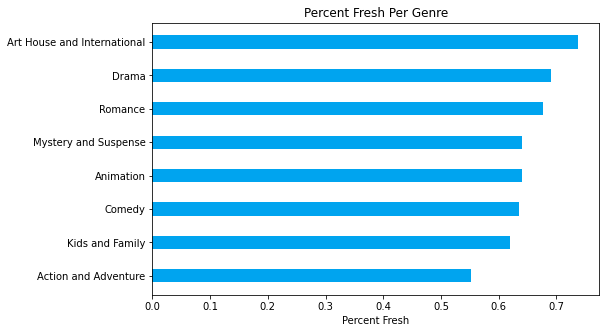

In [61]:
x_axis = top_ten_genres['genre']
y_axis = top_ten_genres['percent fresh']
width = 0.4

fig, ax = plt.subplots(figsize = (8,5))
fig.set_facecolor(color="white")


ax.barh(x_axis, y_axis, width, color='#00A4EF')

ax.set_xlabel('Percent Fresh')
ax.set_title("Percent Fresh Per Genre")

In [62]:
movie_rating_df = pd.DataFrame(columns=['genre', 'R', 'NR', 'PG', 'PG-13', 'G'])

for i in range(len(rating_tally)):
    movie_rating_df = movie_rating_df.append(rating_tally[i], ignore_index=True)

movie_rating_df

,genre,R,NR,PG,PG-13,G
0,Drama,56,19,8,33,1
1,Science Fiction and Fantasy,5,1,3,9,0
2,Comedy,33,6,12,18,0
3,Mystery and Suspense,24,6,0,11,0
4,Action and Adventure,13,3,4,13,0
5,Horror,9,3,0,4,0
6,Art House and International,12,7,1,2,0
7,Musical and Performing Arts,0,1,2,4,0
8,Sports and Fitness,1,0,0,0,0
9,Kids and Family,1,1,11,1,0


In [63]:
movie_rating_df['total_ratings'] = movie_rating_df[movie_rating].sum(axis = 1, skipna = True)

movie_rating_df

,genre,R,NR,PG,PG-13,G,total_ratings
0,Drama,56,19,8,33,1,117.0
1,Science Fiction and Fantasy,5,1,3,9,0,18.0
2,Comedy,33,6,12,18,0,69.0
3,Mystery and Suspense,24,6,0,11,0,41.0
4,Action and Adventure,13,3,4,13,0,33.0
5,Horror,9,3,0,4,0,16.0
6,Art House and International,12,7,1,2,0,22.0
7,Musical and Performing Arts,0,1,2,4,0,7.0
8,Sports and Fitness,1,0,0,0,0,1.0
9,Kids and Family,1,1,11,1,0,14.0


In [64]:
movie_rating_df[movie_rating]

,R,NR,PG,PG-13,G
0,56,19,8,33,1
1,5,1,3,9,0
2,33,6,12,18,0
3,24,6,0,11,0
4,13,3,4,13,0
5,9,3,0,4,0
6,12,7,1,2,0
7,0,1,2,4,0
8,1,0,0,0,0
9,1,1,11,1,0


In [65]:
movie_rating_df['genre'][1]

'Science Fiction and Fantasy'

Text(0.5, 1.0, 'Total Movie Ratings')

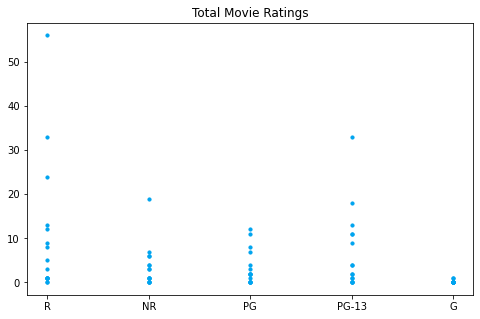

In [66]:
x_axis = movie_rating
width = 10

fig, ax = plt.subplots(figsize = (8,5))
fig.set_facecolor(color="white")

for i in range(len(movie_rating_df)):
    y_axis = movie_rating_df[movie_rating].iloc[i]
    ax.scatter(x_axis, y_axis, width, color='#00A4EF', label= movie_rating_df['genre'][i])

ax.set_title("Total Movie Ratings")


Text(0.5, 1.0, 'Total Movie Ratings')

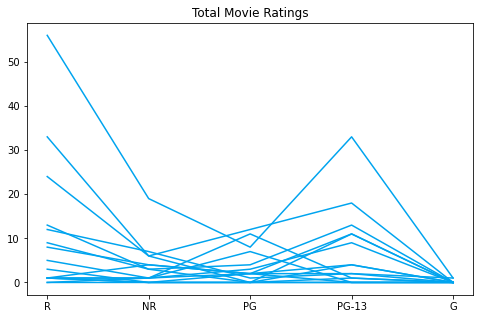

In [67]:
x_axis = movie_rating
width = .4

fig, ax = plt.subplots(figsize = (8,5))
fig.set_facecolor(color="white")

for i in range(len(movie_rating_df)):
    y_axis = movie_rating_df[movie_rating].iloc[i]
    ax.plot(x_axis, y_axis, width, color='#00A4EF', label= movie_rating_df['genre'][i])

ax.set_title("Total Movie Ratings")

Text(0.5, 1.0, 'Total Movie Ratings')

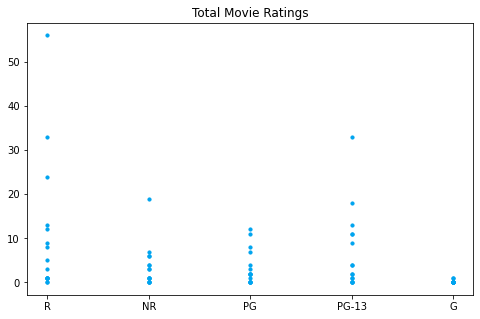

In [68]:
x_axis = movie_rating
width = 10

fig, ax = plt.subplots(figsize = (8,5))
fig.set_facecolor(color="white")

for i in range(len(movie_rating_df)):
    y_axis = movie_rating_df[movie_rating].iloc[i]
    ax.scatter(x_axis, y_axis, width, color='#00A4EF', label= movie_rating_df['genre'][i])

ax.set_title("Total Movie Ratings")

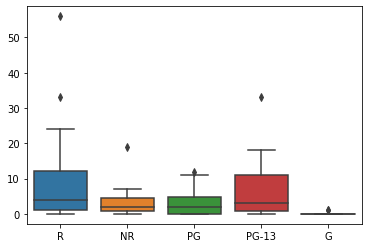

In [70]:
boxplot = sns.boxplot(data=movie_rating_df[movie_rating])
